In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [32]:
car_dataset = pd.read_csv('car data.csv')

In [33]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [34]:
car_dataset.shape

(301, 9)

In [35]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [36]:
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [37]:
car_dataset["Owner"].unique()

array([0, 1, 3])

In [38]:
print(car_dataset['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [39]:
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [40]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-40-2262391978.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-40-2262391978.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-40-2262391978.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects

In [41]:
x = car_dataset.drop(["Car_Name", "Selling_Price"], axis=1)
y = car_dataset["Selling_Price"]

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [43]:
print(x.shape, x_train.shape, x_test.shape)

(301, 7) (270, 7) (31, 7)


In [44]:
lin_reg_model = LinearRegression()

In [45]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [46]:
training_data_prediction = lin_reg_model.predict(x_train)

In [47]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

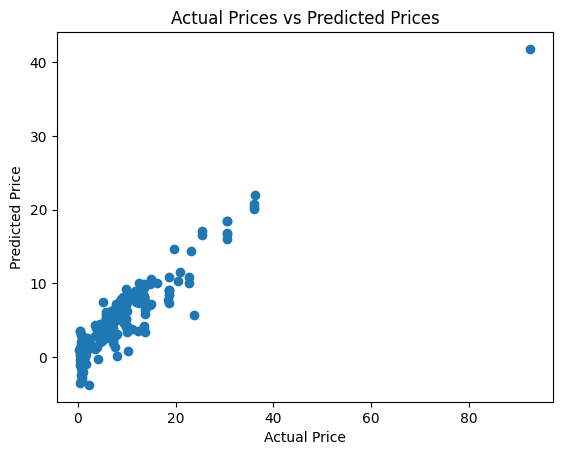

In [50]:
plt.scatter(x_train["Present_Price"],training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

In [51]:
test_data_prediction = lin_reg_model.predict(x_test)


In [52]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

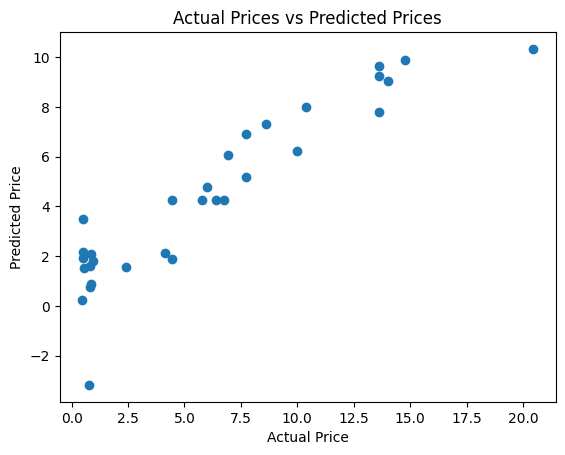

In [53]:
plt.scatter(x_test["Present_Price"],test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

In [54]:
lass_reg_model = Lasso()

In [55]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [56]:
training_data_prediction = lass_reg_model.predict(x_train)

In [57]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

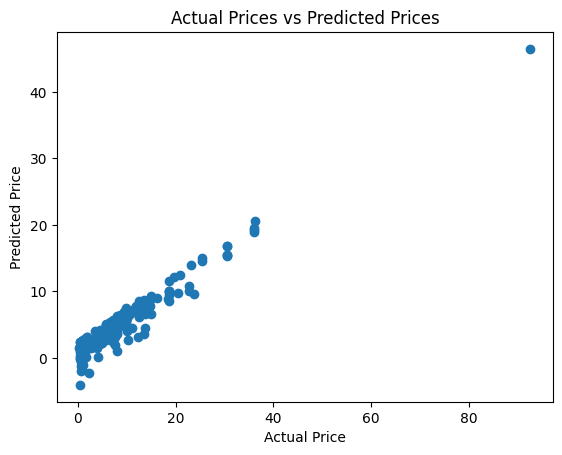

In [58]:
plt.scatter(x_train["Present_Price"],training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

In [59]:
test_data_prediction = lass_reg_model.predict(x_test)

In [63]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

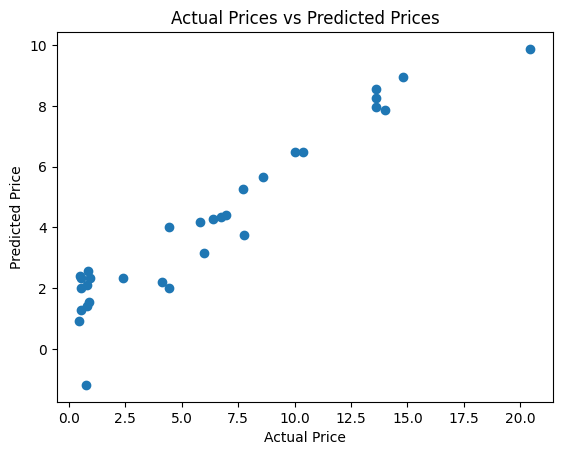

In [64]:
plt.scatter(x_test["Present_Price"],test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")